About Dataset
1. Data Source:
Synthetic data generated from the Wharton Class of 2025's statistics.

2. Meta Data:
application_id: Unique identifier for each application
gender: Applicant's gender (Male, Female)
international: International student (TRUE/FALSE)
gpa: Grade Point Average of the applicant (on 4.0 scale)
major: Undergraduate major (Business, STEM, Humanities)
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)
gmat: GMAT score of the applicant (800 points)
work_exp: Number of years of work experience (Year)
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)
admission: Admission status (Admit, Waitlist, Null: Deny)
3. Usage:
Exploratory Data Analysis (EDA): Understand the distributions, relationships, and patterns within the data.
Classification: Predict the admission status based on other features.
Feel free to leave comments on the discussion. I'd appreciate your upvote if you find my dataset useful! 😀

In [49]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [4]:
# Load the dataset
df = pd.read_csv("/content/MBA.csv")

In [5]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [7]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [9]:
df.tail()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN
6193,6194,Male,False,3.23,STEM,Hispanic,650.0,4.0,Consulting,NaN


In [10]:
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


In [13]:
# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [14]:
df.head(2)


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN


In [15]:
df['gender'] = le.fit_transform(df['gender'])
df['international'] = le.fit_transform(df['international'])
df['major'] = le.fit_transform(df['major'])
df['race'] = le.fit_transform(df['race'])
df['work_industry'] = le.fit_transform(df['work_industry'])
df['admission'] = le.fit_transform(df['admission'])

print("\nEncoded Data:")
print(df)


Encoded Data:
      application_id  gender  international   gpa  major  race   gmat  \
0                  1       0              0  3.30      0     0  620.0   
1                  2       1              0  3.28      1     1  680.0   
2                  3       0              1  3.30      0     5  710.0   
3                  4       1              0  3.47      2     1  690.0   
4                  5       1              0  3.35      2     2  590.0   
...              ...     ...            ...   ...    ...   ...    ...   
6189            6190       1              0  3.49      0     4  640.0   
6190            6191       1              0  3.18      2     1  670.0   
6191            6192       0              1  3.22      0     5  680.0   
6192            6193       1              1  3.36      0     5  590.0   
6193            6194       1              0  3.23      2     2  650.0   

      work_exp  work_industry  admission  
0          3.0              3          0  
1          5.0        

In [16]:
df.corr()


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
application_id,1.000000,-0.022440,0.008045,0.013872,-0.011869,-0.002960,0.004694,0.003100,-0.027823,0.105723
gender,-0.022440,1.000000,0.007646,0.022210,0.025773,0.006240,0.022815,-0.007427,0.001822,0.122788
international,0.008045,0.007646,1.000000,-0.028540,-0.007301,0.710025,-0.014784,-0.010341,-0.001282,-0.010440
gpa,0.013872,0.022210,-0.028540,1.000000,-0.006697,-0.026933,0.577539,0.000346,-0.009687,-0.290997
major,-0.011869,0.025773,-0.007301,-0.006697,1.000000,-0.015330,0.003594,0.006741,0.014921,0.003042
race,-0.002960,0.006240,0.710025,-0.026933,-0.015330,1.000000,-0.022473,0.002930,-0.007882,-0.027166
gmat,0.004694,0.022815,-0.014784,0.577539,0.003594,-0.022473,1.000000,-0.000999,-0.001258,-0.356453
work_exp,0.003100,-0.007427,-0.010341,0.000346,0.006741,0.002930,-0.000999,1.000000,-0.009811,-0.009433
work_industry,-0.027823,0.001822,-0.001282,-0.009687,0.014921,-0.007882,-0.001258,-0.009811,1.000000,0.004361
admission,0.105723,0.122788,-0.010440,-0.290997,0.003042,-0.027166,-0.356453,-0.009433,0.004361,1.000000


array([[<Axes: title={'center': 'application_id'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'international'}>],
       [<Axes: title={'center': 'gpa'}>,
        <Axes: title={'center': 'major'}>,
        <Axes: title={'center': 'race'}>],
       [<Axes: title={'center': 'gmat'}>,
        <Axes: title={'center': 'work_exp'}>,
        <Axes: title={'center': 'work_industry'}>],
       [<Axes: title={'center': 'admission'}>, <Axes: >, <Axes: >]],
      dtype=object)

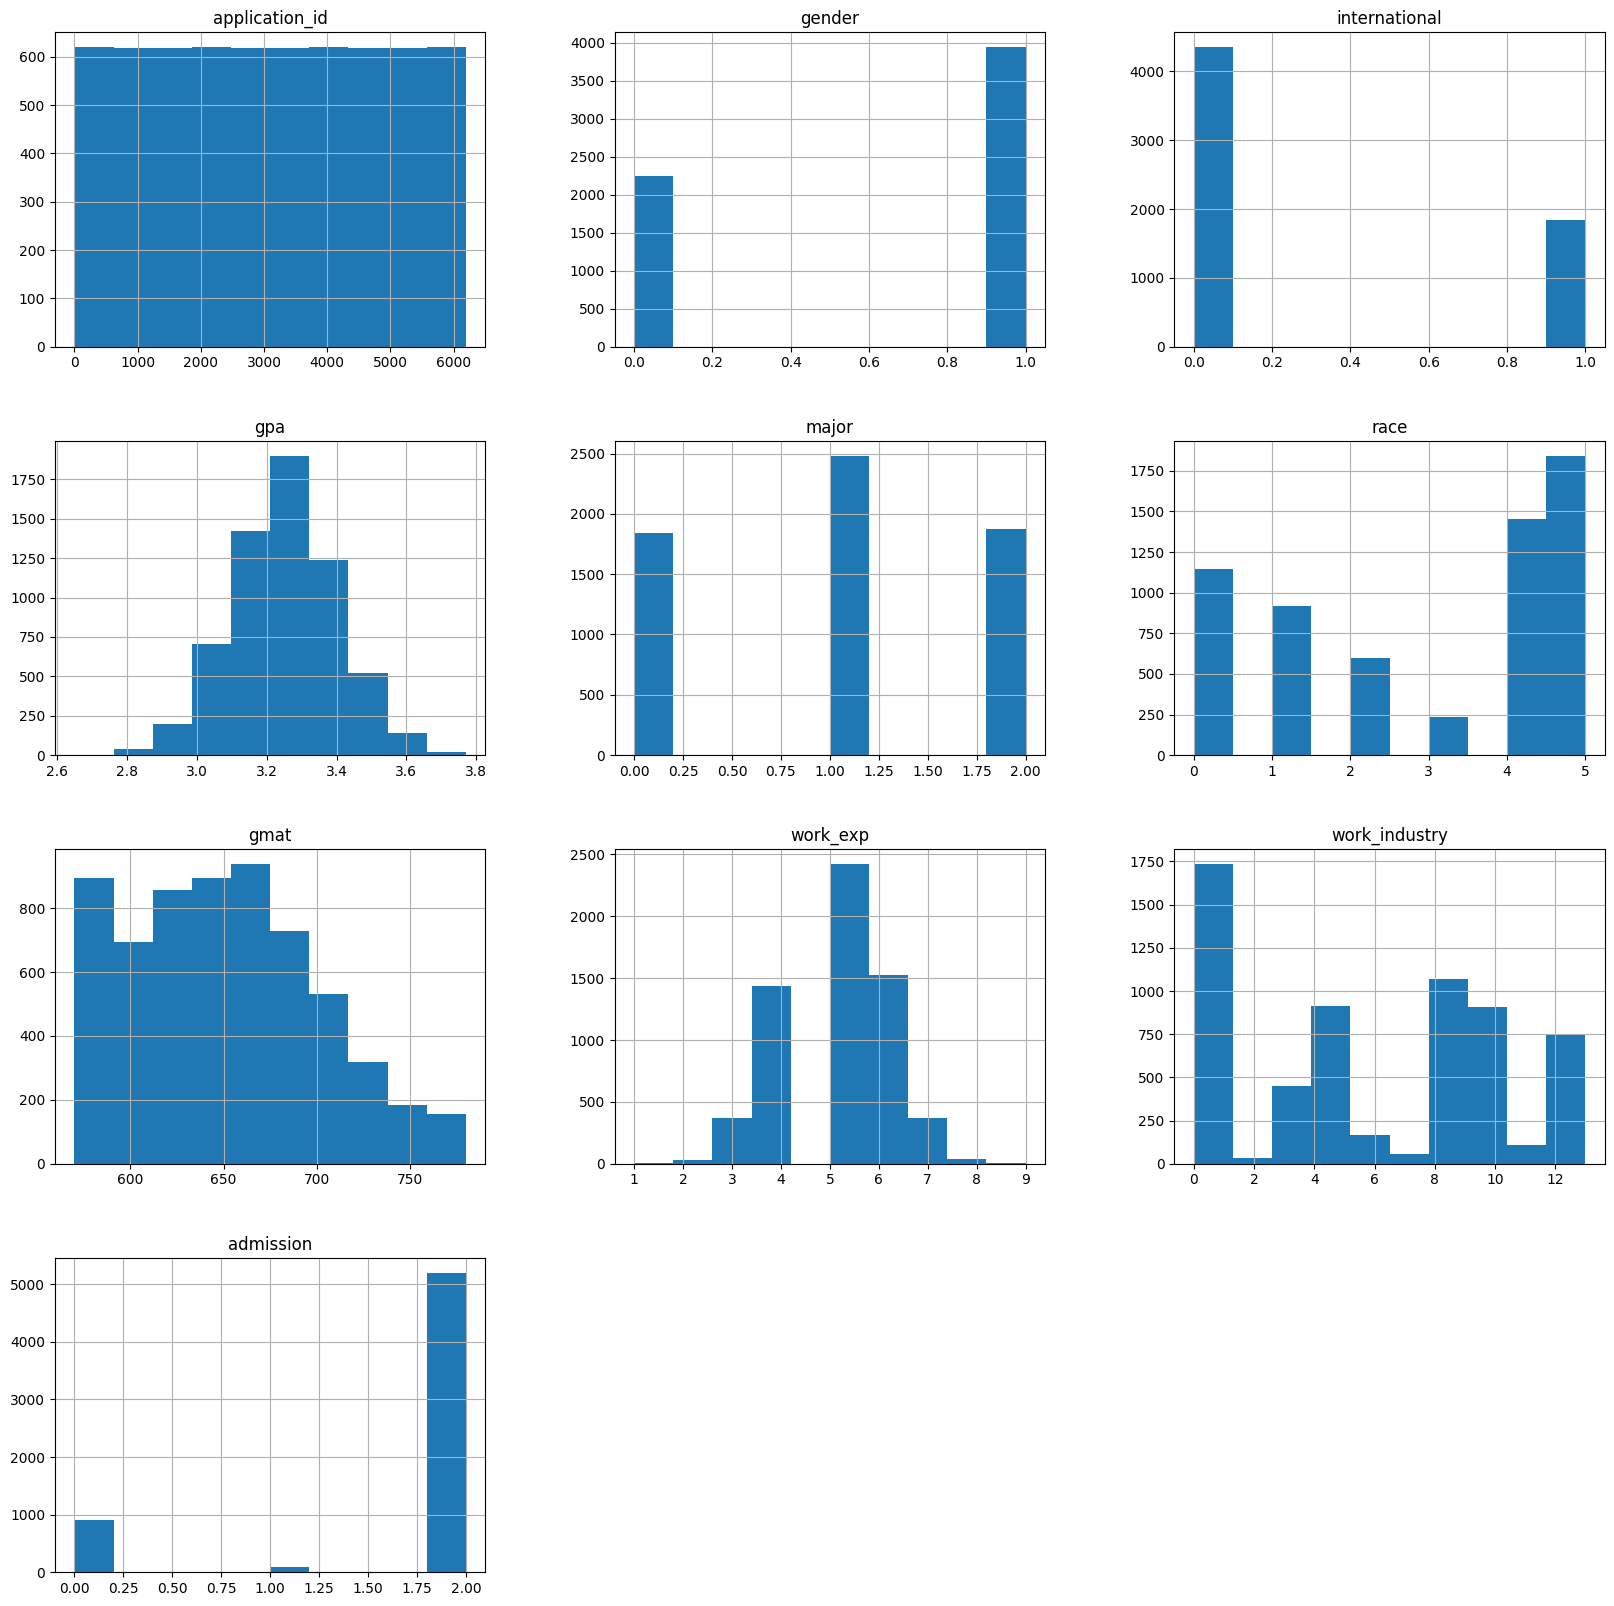

In [18]:

df.hist(figsize = (20,20))

<Axes: >

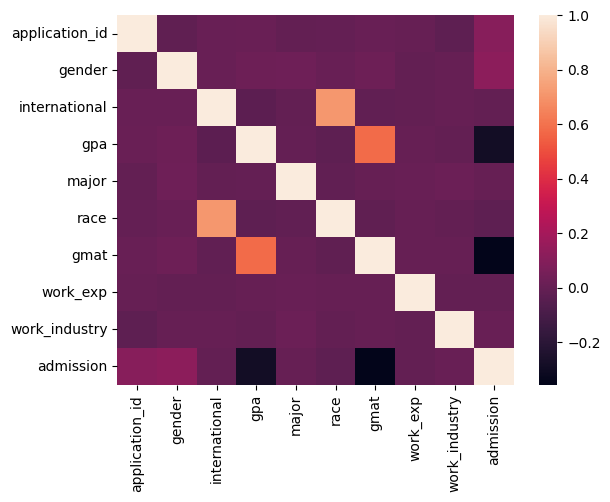

In [19]:
sns.heatmap(df.corr())

In [20]:

# Describe the dataset
df.describe()


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
count,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,0.636584,0.297385,3.250714,1.005974,2.882305,651.092993,5.016952,6.082176,1.693252
std,1788.198115,0.481022,0.457144,0.151541,0.774282,1.940550,49.294883,1.032432,4.234282,0.709464
min,1.000000,0.000000,0.000000,2.650000,0.000000,0.000000,570.000000,1.000000,0.000000,0.000000
25%,1549.250000,0.000000,0.000000,3.150000,0.000000,1.000000,610.000000,4.000000,1.000000,2.000000
50%,3097.500000,1.000000,0.000000,3.250000,1.000000,4.000000,650.000000,5.000000,5.000000,2.000000
75%,4645.750000,1.000000,1.000000,3.350000,2.000000,5.000000,680.000000,6.000000,10.000000,2.000000
max,6194.000000,1.000000,1.000000,3.770000,2.000000,5.000000,780.000000,9.000000,13.000000,2.000000


In [22]:

# Define feature variables (X) and the target variable (y)
X = df.drop('admission', axis=1)
y = df['admission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry
0,1,0,0,3.30,0,0,620.0,3.0,3
1,2,1,0,3.28,1,1,680.0,5.0,6
2,3,0,1,3.30,0,5,710.0,5.0,13
3,4,1,0,3.47,2,1,690.0,6.0,13
4,5,1,0,3.35,2,2,590.0,5.0,1
...,...,...,...,...,...,...,...,...,...
6189,6190,1,0,3.49,0,4,640.0,5.0,9
6190,6191,1,0,3.18,2,1,670.0,4.0,1
6191,6192,0,1,3.22,0,5,680.0,5.0,4
6192,6193,1,1,3.36,0,5,590.0,5.0,9


In [25]:
y

,admission
0,0
1,2
2,0
3,2
4,2
...,...
6189,2
6190,2
6191,0
6192,2


In [26]:
X_test

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry
4370,4371,1,0,3.48,1,4,630.0,5.0,8
3470,3471,1,0,3.27,0,4,610.0,6.0,10
4953,4954,1,0,3.31,2,0,670.0,6.0,8
996,997,1,1,3.29,1,5,660.0,5.0,10
2764,2765,1,1,3.02,2,5,570.0,3.0,10
...,...,...,...,...,...,...,...,...,...
4977,4978,1,1,3.28,0,5,610.0,5.0,10
4342,4343,1,0,2.99,2,1,670.0,5.0,8
5975,5976,1,0,3.10,1,4,620.0,5.0,5
4782,4783,1,0,3.36,1,0,650.0,5.0,13


In [27]:
y_test

,admission
4370,2
3470,2
4953,2
996,2
2764,2
...,...
4977,2
4342,2
5975,2
4782,2


In [28]:
X_train

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry
6189,6190,1,0,3.49,0,4,640.0,5.0,9
711,712,0,0,3.51,1,3,690.0,4.0,1
3954,3955,0,0,3.43,2,0,660.0,4.0,1
1020,1021,0,1,3.25,1,5,670.0,3.0,1
5726,5727,1,0,3.16,0,0,640.0,5.0,12
...,...,...,...,...,...,...,...,...,...
3772,3773,0,0,3.25,1,1,640.0,3.0,6
5191,5192,1,0,3.26,2,3,650.0,4.0,4
5226,5227,1,1,3.27,1,5,660.0,5.0,4
5390,5391,1,0,3.24,1,0,570.0,5.0,1


In [29]:
y_train

,admission
6189,2
711,0
3954,0
1020,0
5726,2
...,...
3772,2
5191,2
5226,0
5390,2


In [30]:
# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier()

In [31]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
# Make predictions on the test data
y_pred = dt_model.predict(X_test)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [34]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 83.54%
Confusion Matrix:
[[ 99   3  94]
 [  5   2  11]
 [ 78  13 934]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.51      0.52       196
           1       0.11      0.11      0.11        18
           2       0.90      0.91      0.91      1025

    accuracy                           0.84      1239
   macro avg       0.52      0.51      0.51      1239
weighted avg       0.83      0.84      0.83      1239



In [51]:
print("Unique classes in the target column:", y.unique())  # This helps us understand the target classes

Unique classes in the target column: [0 2 1]


In [52]:
# Now plot the decision tree
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

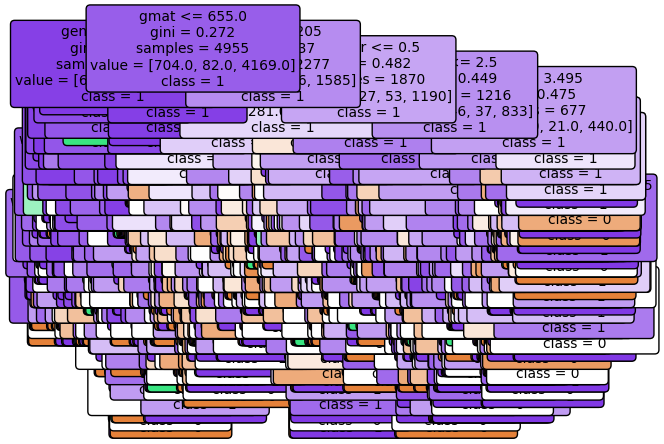

In [53]:
# Use X.columns for feature names, and adjust the class names based on the target column's unique values
plot_tree(dt_model,
          filled=True,
          feature_names=X.columns,  # Feature names from your DataFrame
          class_names=[str(i) for i in y.unique()],  # Dynamically generate class names based on target values
          rounded=True,
          fontsize=10)

plt.show()